In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Importar archivo csv.

In [2]:
path = "C:/Users/tomas/Downloads/Dataset-WinclapApp-TestDS.csv"
df = pd.read_csv(path)

In [3]:
df.head(1)

,app_id,timestamp,platform,country,media_source,spend,spend_currency,target_event_count
0,winclap.com,9/12/20,android,AU,pinterest,100.0,USD,2


In [4]:
df.nunique()


app_id                   1
timestamp              101
platform                 1
country                  3
media_source             5
spend                 2554
spend_currency           1
target_event_count     133
dtype: int64

Eliminar columnas "app_id" "platafotm" and "spend_currency" 

In [5]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        print("Delete ", col)
        df.drop(columns=col, inplace=True)

Delete  app_id
Delete  platform
Delete  spend_currency


Analizando elementos nulos

In [6]:
print("N° Columns : ", len(df.columns))
for col in df.columns:
    val = len(df[df[col].isnull()])
    if val > 0:
        print(col, " HAS ", val, " null elements")
    else:
        print(col, " has NO null elements")

N° Columns :  5
timestamp  has NO null elements
country  has NO null elements
media_source  has NO null elements
spend  has NO null elements
target_event_count  has NO null elements


Ningun elemento nulo presente

Trabajando con columna de fecha

In [7]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

Desagragando el calendario

In [8]:
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day 
df['year'] = df['timestamp'].dt.year
df['quarter'] = df['timestamp'].dt.quarter
df['day_name'] = df['timestamp'].dt.day_name()

In [9]:
df.drop(columns = ["timestamp"], inplace=True) # Ya no se necesita esta columna


In [10]:
df.head(1)

,country,media_source,spend,target_event_count,month,day,year,quarter,day_name
0,AU,pinterest,100.0,2,9,12,2020,3,Saturday


In [11]:
df.nunique()

country                  3
media_source             5
spend                 2554
target_event_count     133
month                    4
day                     31
year                     1
quarter                  2
day_name                 7
dtype: int64

In [12]:
df.drop(columns = ["year"], inplace = True)

In [13]:
df.drop(columns = ["quarter"], inplace = True)

In [14]:
df.nunique()

country                  3
media_source             5
spend                 2554
target_event_count     133
month                    4
day                     31
day_name                 7
dtype: int64

Algunos análisis preliminares

In [15]:
def one_dimensional_scatter(col, alfa = 1):
    values, counts = np.unique(col, return_counts=True)
    sizes = counts*alfa
    colors = ['blue']*len(values)
    #colors[-1] = 'red'

    plt.axhline(1, color='k', linestyle='--')
    plt.scatter(values, np.ones(len(values)), s=sizes, color=colors)
    plt.yticks([])
    plt.show()

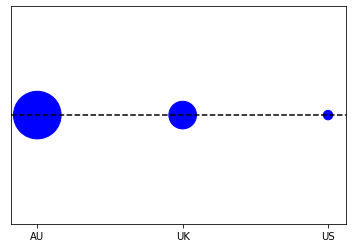

In [16]:
one_dimensional_scatter(df["country"])

Apreciablemente pocos datos referidos a US

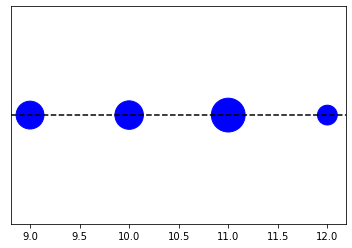

In [17]:
one_dimensional_scatter(df["month"])

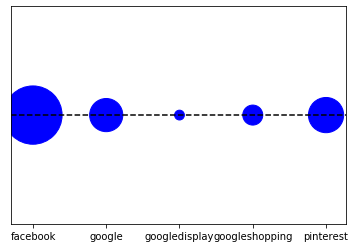

In [18]:
one_dimensional_scatter(df["media_source"], 2)

Googledisplay no fue muy utilizada

In [19]:
df.dtypes

country                object
media_source           object
spend                 float64
target_event_count      int64
month                   int64
day                     int64
day_name               object
dtype: object

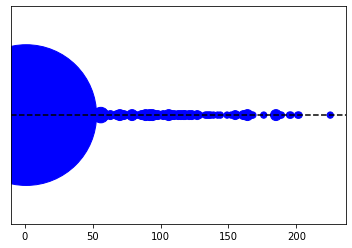

In [20]:
one_dimensional_scatter(df["target_event_count"],40)

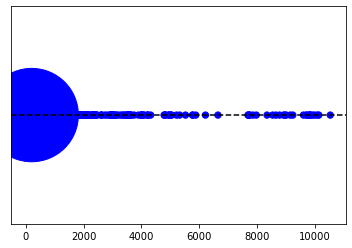

In [21]:
one_dimensional_scatter(df["spend"], 40)

Se observa claramente un concentracion de datos con valores "bajos" para la columna de "spend" and "target_event_count"

Analizar cual es el ratio target/spend

In [22]:
df2 = df.groupby(by=["country","media_source"]).sum()
df2.head(10)

spend  target_event_count  month    day
country media_source                                               
AU      facebook        849764.35               19145  10841  13752
        google           27356.81                3269   4509   6866
        googledisplay     1480.45                  80    469    742
        googleshopping   81176.96                3073   1292   1999
        pinterest       116533.73                2966   6378   9431
UK      facebook        246332.54                9333   6129   7617
        google            2990.02                 517   1037   1725
        googledisplay        2.46                   3     21      3
        googleshopping    8914.98                 332    728   1187
US      facebook         62651.76                1040    924   1389

In [23]:
target_spend = []
for i in range(len(df2)):
    a = df2.iloc[i][1]/df2.iloc[i][0]
    target_spend.append([a,df2.iloc[i].name])
    print("target/spend ", a, "for {}".format(df2.iloc[i].name))

target/spend  0.022529775460690953 for ('AU', 'facebook')
target/spend  0.11949492649179493 for ('AU', 'google')
target/spend  0.054037623695498 for ('AU', 'googledisplay')
target/spend  0.03785556887077319 for ('AU', 'googleshopping')
target/spend  0.025451858444761007 for ('AU', 'pinterest')
target/spend  0.03788780808252132 for ('UK', 'facebook')
target/spend  0.1729085424177766 for ('UK', 'google')
target/spend  1.2195121951219512 for ('UK', 'googledisplay')
target/spend  0.03724068926682954 for ('UK', 'googleshopping')
target/spend  0.016599693288744003 for ('US', 'facebook')


In [24]:
target_spend.sort(reverse = True)
target_spend


[[1.2195121951219512, ('UK', 'googledisplay')],
 [0.1729085424177766, ('UK', 'google')],
 [0.11949492649179493, ('AU', 'google')],
 [0.054037623695498, ('AU', 'googledisplay')],
 [0.03788780808252132, ('UK', 'facebook')],
 [0.03785556887077319, ('AU', 'googleshopping')],
 [0.03724068926682954, ('UK', 'googleshopping')],
 [0.025451858444761007, ('AU', 'pinterest')],
 [0.022529775460690953, ('AU', 'facebook')],
 [0.016599693288744003, ('US', 'facebook')]]

Facebook  PEOR ratio

Google y sus servicios tiene MEJOR ratio

In [25]:
for rat in target_spend:
    if rat[1][0] == "AU":   #"UK", "AU" or "US"
        print(rat)

[0.11949492649179493, ('AU', 'google')]
[0.054037623695498, ('AU', 'googledisplay')]
[0.03785556887077319, ('AU', 'googleshopping')]
[0.025451858444761007, ('AU', 'pinterest')]
[0.022529775460690953, ('AU', 'facebook')]


In [26]:
df.target_event_count.describe()


count    3118.000000
mean       12.751123
std        23.445983
min         1.000000
25%         2.000000
50%         5.000000
75%        13.000000
max       225.000000
Name: target_event_count, dtype: float64

In [27]:
df.spend.describe()

count     3118.000000
mean       448.109064
std       1044.176914
min          0.230000
25%         60.597500
50%        172.475000
75%        378.527500
max      10536.780000
Name: spend, dtype: float64

Lo que podia observarse en las gráficas anteriores. Baja concentración de datos para valores de spend>1500 and target>40

Analisis con PyOD

In [28]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN 
from pyod.models.copod import COPOD 
from pyod.models.iforest import IForest
from pyod.models.pca import PCA
from pyod.models.mcd import MCD

Probare con varios modelos. 

In [29]:
models = { "Knn" : KNN(n_neighbors=5, contamination = 0.1), "ABOD" : ABOD(contamination = 0.1), "Comod" : COPOD(contamination = 0.1), "IFores" : IForest(bootstrap = True), "PCA" : PCA(contamination = 0.1), "MCD" : MCD() }

In [30]:
def Make_model(clf, X_train, X_pred):
    clf.fit(X_train)
    y_pred = clf.predict(X_pred)
    return y_pred

In [31]:
df_train = df.copy()
#df_to_predic = df.copy()
#df_train = df_train[df_train["country"]=="UK"]
#df_train = pd.concat((df_train,df[(df["country"]=="AU")&(df["media_source"]=="facebook")].sample(588)))
#df_train = pd.concat((df_train,df[(df["country"]=="AU")&(df["media_source"]=="google")].sample(102)))
#df_train = pd.concat((df_train,df[(df["country"]=="AU")&(df["media_source"]=="googledisplay")].sample(2)))
#df_train = pd.concat((df_train,df[(df["country"]=="AU")&(df["media_source"]=="googleshopping")].sample(71)))
#df_train = pd.concat((df_train,df[(df["country"]=="AU")&(df["media_source"]=="pinterest")].sample(71)))
#df_train = pd.concat((df_train,df[df["country"]=="US"]))

In [32]:
df_train.groupby(["country","media_source"]).count()

spend  target_event_count  month   day  day_name
country media_source                                                    
AU      facebook         1023                1023   1023  1023      1023
        google            448                 448    448   448       448
        googledisplay      46                  46     46    46        46
        googleshopping    129                 129    129   129       129
        pinterest         620                 620    620   620       620
UK      facebook          588                 588    588   588       588
        google            102                 102    102   102       102
        googledisplay       2                   2      2     2         2
        googleshopping     71                  71     71    71        71
US      facebook           89                  89     89    89        89

In [33]:
#df_train["index"] = list(range(len(df_train)))
#df_train.set_index("index", inplace = True)

In [34]:
df_train.drop(columns = "day_name", inplace = True)
#df_to_predic.drop(columns = "day_name", inplace = True)

In [35]:
country_vector = pd.get_dummies(df_train["country"])
mediasource_vector = pd.get_dummies(df_train["media_source"])

In [36]:
#country_vector2 = pd.get_dummies(df_to_predic["country"])
#mediasource_vector2 = pd.get_dummies(df_to_predic["media_source"])

In [37]:
df_train = pd.concat([df_train, country_vector, mediasource_vector],axis=1)
#df_to_predic = pd.concat([df_to_predic, country_vector2, mediasource_vector2],axis=1)

In [38]:
df_train.drop(columns = "country", inplace = True)
df_train.drop(columns = "media_source", inplace = True)
df_train.head()

,spend,target_event_count,month,day,AU,UK,US,facebook,google,googledisplay,googleshopping,pinterest
0,100.0,2,9,12,1,0,0,0,0,0,0,1
1,300.0,9,12,6,1,0,0,0,0,0,0,1
2,300.0,1,12,5,1,0,0,0,0,0,0,1
3,300.0,5,12,4,1,0,0,0,0,0,0,1
4,100.0,2,9,11,1,0,0,0,0,0,0,1


In [39]:
#df_to_predic.drop(columns = "country", inplace = True)
#df_to_predic.drop(columns = "media_source", inplace = True)
#df_to_predic.head()

In [40]:
df_train.drop(columns=["day"], inplace = True)

In [41]:
#df_to_predic.drop(columns=["day","day_week"], inplace = True)

In [42]:
print(df_train.columns)
#print(df_to_predic.columns)

Index(['spend', 'target_event_count', 'month', 'AU', 'UK', 'US', 'facebook',
       'google', 'googledisplay', 'googleshopping', 'pinterest'],
      dtype='object')


In [43]:
y_pred = []
#df_train = pd.concat((df_train["spend"],df_train["target_event_count"]),axis=1)
for (clf_name, clf) in models.items():
    predictions = Make_model(clf, df_train, df_train)
    y_pred.append(predictions)
    print(clf_name, " predicted ", sum(predictions), " outliers")

C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


Knn  predicted  284  outliers


C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\numpy\core\_m

ABOD  predicted  0  outliers
Comod  predicted  312  outliers


C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


IFores  predicted  312  outliers
PCA  predicted  312  outliers


C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\sklearn\covariance\_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


MCD  predicted  312  outliers


C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


In [44]:
M_D = []
for i in range(6):
    val = list(range(i,6))
    for j in val:
        M_D.append((i,j,len(y_pred[0])-sum(y_pred[i] == y_pred[j])))

Analizar predicciones diferentes

In [45]:
M_D = pd.DataFrame(M_D)
M_D.sort_values(2)

,0,1,2
0,0,0,0
18,4,4,0
15,3,3,0
11,2,2,0
6,1,1,0
20,5,5,0
5,0,5,96
12,2,3,132
13,2,4,168
16,3,4,172


In [46]:
df2 = pd.DataFrame({"{}".format(list(models.keys())[i]) :ar  for i,ar in enumerate(y_pred)})

In [47]:
#df2.drop(columns=["Knn", "ABOD"], inplace=True)
df2[((df2.sum(axis=1)==0)|(df2.sum(axis=1)==6))&(df2["Knn"]==0)]  #Todos los valores de coincidencia

,Knn,ABOD,Comod,IFores,PCA,MCD
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
3089,0,0,0,0,0,0
3090,0,0,0,0,0,0
3091,0,0,0,0,0,0
3093,0,0,0,0,0,0


In [48]:
import seaborn as sns

count    3118.000000
mean       12.751123
std        23.445983
min         1.000000
25%         2.000000
50%         5.000000
75%        13.000000
max       225.000000
Name: target_event_count, dtype: float64

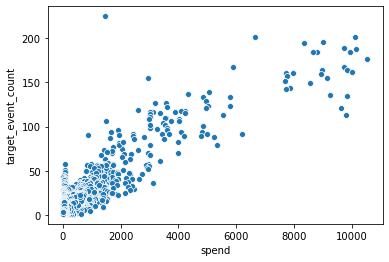

In [49]:
ax = sns.scatterplot(x="spend", y="target_event_count", data=df)
df.target_event_count.describe()

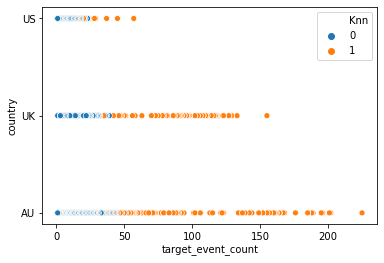

In [50]:
df3 = pd.concat((df,df2), axis=1)
sns.scatterplot(x="target_event_count", y="country", hue = "Knn" ,data=df3)

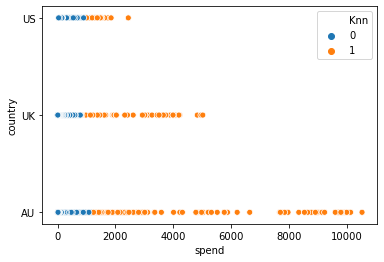

In [51]:
df3 = pd.concat((df,df2), axis=1)
sns.scatterplot(x="spend", y="country", hue = "Knn" ,data=df3)

[(0, 100), (0, 6000)]

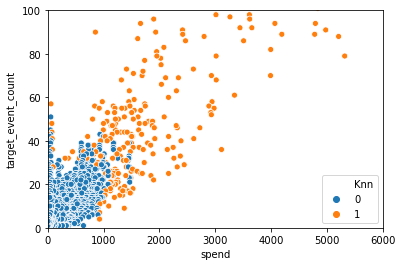

In [52]:
df3 = pd.concat((df,df2), axis=1)
a = sns.scatterplot(x="spend", y="target_event_count", hue = "Knn" ,data=df3)
a.set(xlim=(0,6000), ylim=(0,100))

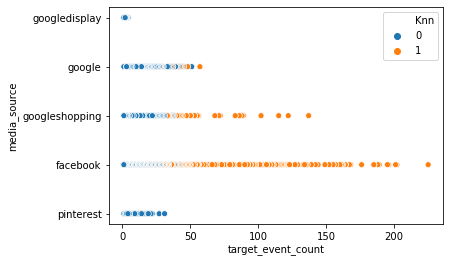

In [53]:
b = sns.scatterplot(x="target_event_count", y="media_source", hue = "Knn" ,data=df3)
#b.set(xlim=(0,6000), ylim=(0,100))

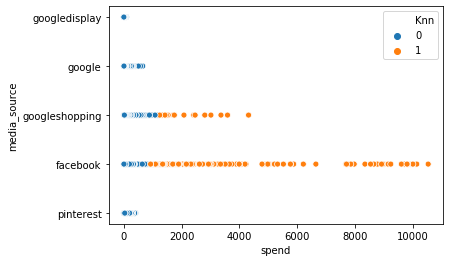

In [54]:
b = sns.scatterplot(x="spend", y="media_source", hue = "Knn" ,data=df3)
#b.set(xlim=(0,6000), ylim=(0,100))

En estas últimas gráficas se observan los puntos (naranja) que los modelos toman cómo valores atípicos.

Pareciera que, por ejemplo, para la última imagen la mayoria de los datos en las que la fuente de medio fue "facebook" los valores son atípicos. Esto no es así,ya que la mayor concentracion de valores (más del 80%) se encuentran para datos cuyo gasto (spend) fue menor a 1000 US (en unidades correspondientes al dataset)


El valor medio para los gastos (spend) es de 448 PERO el percentil 75 es de 378 (mostrando, una vez más la concentracion de los datos)

Analizando el ratio volúmen de eventos/ dinero invertido en campaña es PEOR cuando se utiliza como medio a Facebook.

In [56]:
df3 = pd.concat((df,df2,df_train[["US","AU","UK","facebook","google","pinterest","googleshopping","googledisplay"]]), axis=1)

Graficar datos en función de pais, media_source, etc.

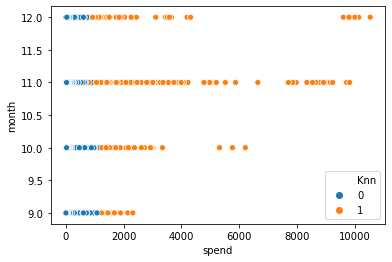

In [57]:
sns.scatterplot(x="spend", y="month", hue = "Knn" ,data=df3)  #hue= "US", "AU", "google", etc.

Los dos modelos que se optan para predecir los outliers son el Knn y el MCD por sobre el IFores y el PCA (ya que estos toman como valor atípico todos los datos con media_source =  googledisplay.

In [59]:
def Preprocessing_to_predict(df):
    df_train = df.copy()
    country_vector = pd.get_dummies(df_train["country"])
    mediasource_vector = pd.get_dummies(df_train["media_source"])
    df_train = pd.concat([df_train, country_vector, mediasource_vector],axis=1)
    df_train.drop(columns = "country", inplace = True)
    df_train.drop(columns = "media_source", inplace = True)
    df_train["timestamp"] = pd.to_datetime(df_train["timestamp"])
    df_train['month'] = df_train['timestamp'].dt.month
    df_train.drop(columns="timestamp", inplace = True)
    df_train.drop(columns="platform", inplace = True)
    df_train.drop(columns="spend_currency", inplace = True)
    df_train.drop(columns="app_id", inplace = True)
    df_train = df_train[['spend', 'target_event_count', 'month', 'AU', 'UK', 'US', 'facebook',
       'google', 'googledisplay', 'googleshopping', 'pinterest']]
    
    return df_train

Datos a usar para predecir nuevos outliers

In [64]:
path = "C:/Users/tomas/Downloads/Dataset-WinclapApp-TestDS.csv"
df_to_predict = pd.read_csv(path)

Modelo KNN

In [61]:
clf_KNN = KNN()
clf_KNN.fit(df_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [62]:
df_to_predict = Preprocessing_to_predict(df_to_predict) 
clf.predict(df_to_predict)

C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


array([0, 0, 0, ..., 0, 0, 0])

Modelo CMD

In [63]:
clf_MCD = MCD()
clf_MCD.fit(df_train)

C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\sklearn\covariance\_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [65]:
df_to_predict = Preprocessing_to_predict(df_to_predict)
clf.predict(df_to_predict)

C:\Users\tomas\Miniconda3\envs\deep_learning\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


array([0, 0, 0, ..., 0, 0, 0])

Últimos análisis


In [66]:
df.corr()

,spend,target_event_count,month,day
spend,1.000000,0.901125,0.163639,0.007900
target_event_count,0.901125,1.000000,0.129648,0.026783
month,0.163639,0.129648,1.000000,-0.194309
day,0.007900,0.026783,-0.194309,1.000000


Se observa una alta correlación entre dinero invertido y volúmen de evento producidos. No obstante, cuando uno desagrega es información por medio

In [67]:
for arg in ["UK","US", "AU"]:
    print("Correlación para ", arg, df[df["country"]==arg].corr().iloc[0,1],"Sobre ", len(df[df["country"]==arg]), " datos" )

Correlación para  UK 0.946727499355703 Sobre  763  datos
Correlación para  US 0.8171265977295243 Sobre  89  datos
Correlación para  AU 0.9081708535457288 Sobre  2266  datos


In [68]:
for arg in ['facebook',
       'google', 'googledisplay', 'googleshopping', 'pinterest']:
    print("Correlación para ", arg, df[df["media_source"]==arg].corr().iloc[0,1], "Sobre ", len(df[df["media_source"]==arg]), " datos")

Correlación para  facebook 0.9151021779146248 Sobre  1700  datos
Correlación para  google 0.2397146920748467 Sobre  550  datos
Correlación para  googledisplay 0.19787175400026077 Sobre  48  datos
Correlación para  googleshopping 0.9795955189567183 Sobre  200  datos
Correlación para  pinterest 0.2652755777144977 Sobre  620  datos


EL observar una alta correlación para Facebook nos indique que si bien el ratio es menor (se gasta más para conseguir un determinado volúmen de evento), esta relacion es creciente y muy marcada. Mienstras que para google, si bien tenia un buen ratio (se gasta menos para conseguir un determinado volúmen), esta relacion no es lineal. Es decir, invertir más en google NO garantiza obtener más volúmen de eventos (mientras que para facebook, la relacion pareceria esta garantizada).

Esta última afirmación puede observarse en las graficas de abajo. En donde se grafica la relación entre gasto y eventos, para ambos medios.

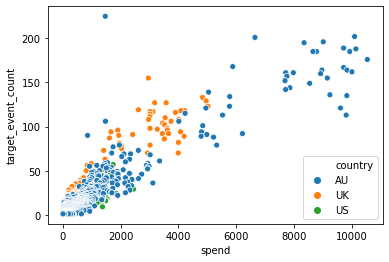

In [69]:
sns.scatterplot(x="spend", y="target_event_count", hue="country",data=df[df["media_source"]=="facebook"])

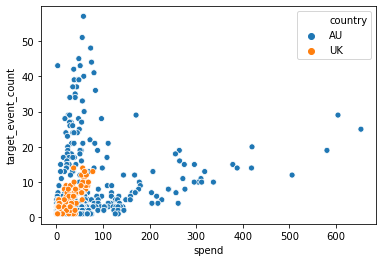

In [70]:
sns.scatterplot(x="spend", y="target_event_count", hue="country",data=df[df["media_source"]=="google"])

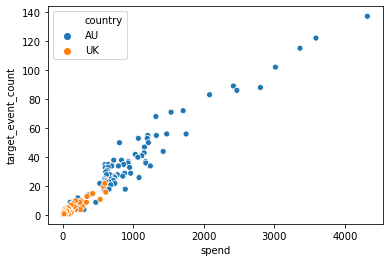

In [71]:
sns.scatterplot(x="spend", y="target_event_count", hue="country",data=df[df["media_source"]=="googleshopping"])

Googleshopping pareceria ser un excelente canal para invertir. Posee un ratio de evento/gasto mayor que facebook manteniendo una fuerte linealidad entre evento obtenidos y gasto